In [1]:
import pandas as pd
import numpy as np
import regex as re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, fbeta_score, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve


In [2]:
dfweek = pd.read_csv('../data/raw/week_approach.csv')
dfweek.head(20)

,nr. sessions,nr. rest days,total kms,max km one day,total km Z3-Z4-Z5-T1-T2,"nr. tough sessions (effort in Z5, T1 or T2)",nr. days with interval session,total km Z3-4,max km Z3-4 one day,total km Z5-T1-T2,...,max training success.2,avg recovery.2,min recovery.2,max recovery.2,Athlete ID,injury,rel total kms week 0_1,rel total kms week 0_2,rel total kms week 1_2,Date
0,5.0,2.0,22.2,16.4,11.8,1.0,2.0,10.0,10.0,0.6,...,0.0,0.18,0.16,0.20,0,0,0.718447,1.378882,1.919255,0
1,5.0,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.0,0.18,0.16,0.20,0,0,0.683544,1.018868,1.490566,1
2,5.0,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.0,0.17,0.16,0.18,0,0,0.683544,1.018868,1.490566,2
3,5.0,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.0,0.18,0.16,0.18,0,0,0.683544,1.018868,1.490566,3
4,6.0,1.0,39.2,17.6,18.9,1.0,3.0,17.2,10.0,0.5,...,0.0,0.17,0.16,0.18,0,0,2.202247,1.361111,0.618056,4
5,6.0,1.0,39.2,17.6,18.9,1.0,3.0,17.2,10.0,0.5,...,0.0,0.17,0.16,0.18,0,0,2.202247,1.361111,0.618056,5
6,6.0,1.0,33.3,17.6,15.4,1.0,3.0,13.7,7.2,0.5,...,0.0,0.17,0.16,0.18,0,0,1.500000,1.077670,0.718447,6
7,5.0,2.0,33.3,17.6,15.4,1.0,3.0,13.7,7.2,0.5,...,0.0,0.17,0.16,0.18,0,0,1.500000,1.077670,0.718447,7
8,5.0,2.0,32.9,17.6,15.5,0.0,3.0,14.3,7.2,0.0,...,0.0,0.17,0.16,0.18,0,0,1.523148,1.041139,0.683544,8
9,5.0,2.0,32.9,17.6,15.5,0.0,3.0,14.3,7.2,0.0,...,0.0,0.17,0.16,0.18,0,0,1.523148,1.041139,0.683544,9


In [3]:
dfday = pd.read_csv('../data/raw/day_approach.csv')
dfday.head(20)

,nr. sessions,total km,km Z3-4,km Z5-T1-T2,km sprinting,strength training,hours alternative,perceived exertion,perceived trainingSuccess,perceived recovery,...,km Z5-T1-T2.6,km sprinting.6,strength training.6,hours alternative.6,perceived exertion.6,perceived trainingSuccess.6,perceived recovery.6,Athlete ID,injury,Date
0,1.0,5.8,0.0,0.6,1.2,0.0,0.00,0.11,0.00,0.18,...,0.0,0.0,0.0,1.0,0.10,0.00,0.15,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,...,0.5,1.2,0.0,0.0,0.10,0.00,0.17,0,0,1
2,1.0,0.0,0.0,0.0,0.0,1.0,0.00,0.10,0.00,0.17,...,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,0,0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,...,0.0,0.0,1.0,0.0,0.10,0.00,0.17,0,0,3
4,1.0,0.0,0.0,0.0,0.0,0.0,1.08,0.08,0.00,0.18,...,0.0,0.0,0.0,0.0,0.11,0.00,0.17,0,0,4
5,1.0,16.4,10.0,0.0,0.0,1.0,0.00,0.11,0.00,0.17,...,0.0,0.0,0.0,1.0,0.08,0.00,0.17,0,0,5
6,1.0,0.0,0.0,0.0,0.0,0.0,1.00,0.10,0.00,0.15,...,0.0,0.0,0.0,0.0,0.09,0.00,0.18,0,0,6
7,1.0,5.2,0.0,0.5,1.2,0.0,0.00,0.10,0.00,0.17,...,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,0,0,7
8,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,...,0.0,1.2,0.0,0.0,0.11,0.00,0.18,0,0,8
9,1.0,0.0,0.0,0.0,0.0,1.0,0.00,0.10,0.00,0.17,...,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,0,0,9


In [4]:
dfweek.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42798 entries, 0 to 42797
Data columns (total 72 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   nr. sessions                                   42798 non-null  float64
 1   nr. rest days                                  42798 non-null  float64
 2   total kms                                      42798 non-null  float64
 3   max km one day                                 42798 non-null  float64
 4   total km Z3-Z4-Z5-T1-T2                        42798 non-null  float64
 5   nr. tough sessions (effort in Z5, T1 or T2)    42798 non-null  float64
 6   nr. days with interval session                 42798 non-null  float64
 7   total km Z3-4                                  42798 non-null  float64
 8   max km Z3-4 one day                            42798 non-null  float64
 9   total km Z5-T1-T2                              427

In [5]:
dfday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42766 entries, 0 to 42765
Data columns (total 73 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   nr. sessions                 42766 non-null  float64
 1   total km                     42766 non-null  float64
 2   km Z3-4                      42766 non-null  float64
 3   km Z5-T1-T2                  42766 non-null  float64
 4   km sprinting                 42766 non-null  float64
 5   strength training            42766 non-null  float64
 6   hours alternative            42766 non-null  float64
 7   perceived exertion           42766 non-null  float64
 8   perceived trainingSuccess    42766 non-null  float64
 9   perceived recovery           42766 non-null  float64
 10  nr. sessions.1               42766 non-null  float64
 11  total km.1                   42766 non-null  float64
 12  km Z3-4.1                    42766 non-null  float64
 13  km Z5-T1-T2.1   

# Cleaning

# Drop subjective features
Percieved exertion and similar features will not be present in the user data and as such should not be present in the training data. While there is some capacity in gamin to track strength workouts, that will also be dropped as it doesn't seem to be common practice among runners to track it. It can possibly be added at a later date. whether a session is sprinting or intervals is also untracked in garmin and will need to be dropped.

In [6]:
dfday.drop(list(dfday.filter(regex = 'perceived|sprinting|strength')), axis = 1, inplace = True)
dfday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42766 entries, 0 to 42765
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   nr. sessions         42766 non-null  float64
 1   total km             42766 non-null  float64
 2   km Z3-4              42766 non-null  float64
 3   km Z5-T1-T2          42766 non-null  float64
 4   hours alternative    42766 non-null  float64
 5   nr. sessions.1       42766 non-null  float64
 6   total km.1           42766 non-null  float64
 7   km Z3-4.1            42766 non-null  float64
 8   km Z5-T1-T2.1        42766 non-null  float64
 9   hours alternative.1  42766 non-null  float64
 10  nr. sessions.2       42766 non-null  float64
 11  total km.2           42766 non-null  float64
 12  km Z3-4.2            42766 non-null  float64
 13  km Z5-T1-T2.2        42766 non-null  float64
 14  hours alternative.2  42766 non-null  float64
 15  nr. sessions.3       42766 non-null 

In [7]:
dfweek.drop(list(dfweek.filter(regex = 'recovery|training success|exertion|interval|strength')), axis = 1, inplace = True)
dfweek.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42798 entries, 0 to 42797
Data columns (total 39 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   nr. sessions                                   42798 non-null  float64
 1   nr. rest days                                  42798 non-null  float64
 2   total kms                                      42798 non-null  float64
 3   max km one day                                 42798 non-null  float64
 4   total km Z3-Z4-Z5-T1-T2                        42798 non-null  float64
 5   nr. tough sessions (effort in Z5, T1 or T2)    42798 non-null  float64
 6   total km Z3-4                                  42798 non-null  float64
 7   max km Z3-4 one day                            42798 non-null  float64
 8   total km Z5-T1-T2                              42798 non-null  float64
 9   max km Z5-T1-T2 one day                        427

In [8]:
dfday['Athlete ID'].nunique()

74

In [9]:
dfday['Date'].nunique()

2614

# Exploring

### Looking at an individual Athlete over time
to really get a better sense of what is contained in the dataset, I want to create some visualisations of what various features look like over time for a given athlete, specifically at the daily count. for simplicity I'll look at only the data over two years.

In [10]:
Athlete_investigate = dfday[dfday['Athlete ID'] == 30].head(2000)

Want to look at data on a daily scale here just for visualisation, so lagged values will be removed

In [11]:
Athlete_investigate.drop(list(Athlete_investigate.filter(regex = r'\.[1-6]$')), axis = 1, inplace = True)

In [12]:
Athlete_investigate.head(20)

,nr. sessions,total km,km Z3-4,km Z5-T1-T2,hours alternative,Athlete ID,injury,Date
18242,0.0,0.0,0.0,0.0,0.0,30,0,0
18243,1.0,2.5,0.0,0.0,0.0,30,0,1
18244,0.0,0.0,0.0,0.0,0.0,30,0,2
18245,1.0,3.7,0.0,0.0,0.0,30,0,3
18246,0.0,0.0,0.0,0.0,0.0,30,0,4
18247,0.0,0.0,0.0,0.0,0.0,30,0,5
18248,0.0,0.0,0.0,0.0,0.0,30,0,6
18249,0.0,0.0,0.0,0.0,0.0,30,0,7
18250,1.0,4.0,0.0,0.0,0.0,30,0,8
18251,0.0,0.0,0.0,0.0,0.0,30,0,9


In [13]:
Athlete_investigate[Athlete_investigate['km Z5-T1-T2']!= 0]


,nr. sessions,total km,km Z3-4,km Z5-T1-T2,hours alternative,Athlete ID,injury,Date


How many injuries did they sustain in the time period? We may need to expand the time period if they don't get injured at all. But annual injury rate is like 75% so I'm hopeful

In [14]:
Athlete_investigate[Athlete_investigate['injury']==1]

,nr. sessions,total km,km Z3-4,km Z5-T1-T2,hours alternative,Athlete ID,injury,Date


 Ouch!
I think this makes this user ideal to investigate. Research tells me that one of the main predictors of injury is historical injury, so this pattern whereby the athlete has no injuries for the first 300 days and then 7 in a span of just over 200 days is to be expected. The data do not unfortunately tell us if this is the same injury reoccuring, a three week span before and after each injury was required by the data collectors in Lovdal 2021 to define an injury event

>Injuries can be extracted from the so-called “flags” in the
training log. These flags are defined as “unable to complete thescheduled session due to injury.” They cover both cases where an
athlete starts a session but interrupts it due to injury, and cases
where the athlete skips the session due to injury.  
>In our data set, injuries are reflected by all records flagged
with injury from the training log, whereby it was required that
the athletes were training injury free 3 weeks prior to the session
flagged with injury. For the healthy events, we demanded that
the athlete is fully fit 3 weeks before and 3 weeks after the event
day. Moreover, events that contained missing or anomalous data
were removed from our data set.  
>Finally, injury events shortly following (within 3 wk of) a new
injury have been filtered out, as they are considered to correspond to
the same injury


Visually, it might be valuable to compute rolling averages. 

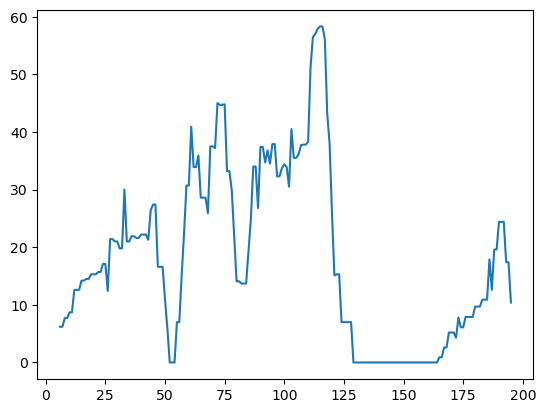

In [15]:
Athlete_investigate['weekvolume'] = Athlete_investigate['total km'].rolling(window=7).sum()
plt.plot(Athlete_investigate['Date'],Athlete_investigate['weekvolume'])

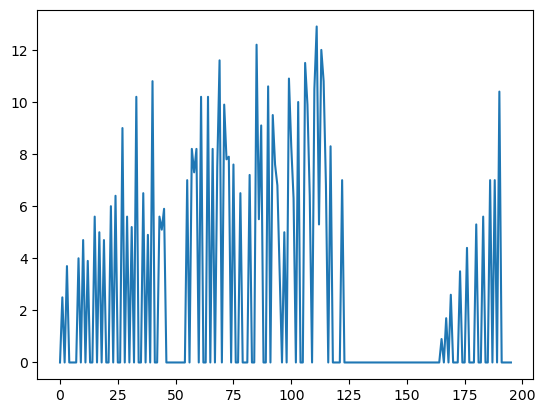

In [16]:
plt.plot(Athlete_investigate['Date'], Athlete_investigate['total km'])

In [17]:
Athlete_investigate['Date'].nunique()

196

In [18]:
Athlete_investigate.shape

(196, 9)

### Distribution of events
looking at amount of events per athlete and per date, to get a feel of what the overall dataset represents. The lowest 

In [19]:
events_per_athlete = pd.DataFrame(dfday['Athlete ID'].value_counts())
events_per_athlete

,Athlete ID
32,1791
20,1723
22,1478
43,1471
41,1393
...,...
11,154
39,130
15,126
55,48


In [20]:
# for each athlete, how many injury = 0 are there, and how many injury = 1
injury_per_athlete = pd.DataFrame(dfday.groupby('Athlete ID')['injury'].value_counts())
injury_per_athlete = injury_per_athlete.unstack().fillna(0)
injury_per_athlete.columns = ['injury_0','injury_1']
i = 0
for index, row in injury_per_athlete.iterrows():
    if row['injury_1'] == 0:
        i += 1      
print(i) 

11


(array([ 30.,   0.,   9.,   0.,  10.,   0.,  16.,   0.,  36.,   0.,  30.,
          0.,  47.,   0.,  35.,   0.,  44.,   0.,   0.,  67.,   0.,  96.,
          0., 168.,   0., 197.,   0., 216.,   0., 263.,   0., 281.,   0.,
        225.,   0.,   0., 184.,   0., 143.,   0., 132.,   0.,  87.,   0.,
         49.,   0.,  16.,   0.,   2.,   0.,   1.,   0.,   5.,   0.,   0.,
          1.,   0.,   0.,   0.,  28.,   0.,   0.,   0.,  27.,   0.,   1.,
          0.,  14.,   0.,  39.,   0., 115.]),
 array([ 1.        ,  1.47222222,  1.94444444,  2.41666667,  2.88888889,
         3.36111111,  3.83333333,  4.30555556,  4.77777778,  5.25      ,
         5.72222222,  6.19444444,  6.66666667,  7.13888889,  7.61111111,
         8.08333333,  8.55555556,  9.02777778,  9.5       ,  9.97222222,
        10.44444444, 10.91666667, 11.38888889, 11.86111111, 12.33333333,
        12.80555556, 13.27777778, 13.75      , 14.22222222, 14.69444444,
        15.16666667, 15.63888889, 16.11111111, 16.58333333, 17.05555556,

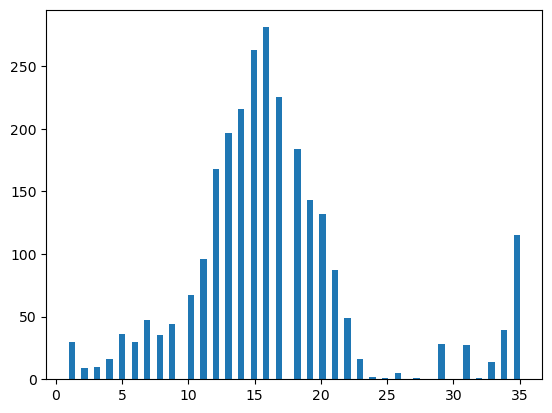

In [21]:
events_per_date = pd.DataFrame(dfday['Date'].value_counts())
events_per_date
plt.hist(events_per_date['Date'],bins=72)

In [22]:
dfday.head()

,nr. sessions,total km,km Z3-4,km Z5-T1-T2,hours alternative,nr. sessions.1,total km.1,km Z3-4.1,km Z5-T1-T2.1,hours alternative.1,...,km Z5-T1-T2.5,hours alternative.5,nr. sessions.6,total km.6,km Z3-4.6,km Z5-T1-T2.6,hours alternative.6,Athlete ID,injury,Date
0,1.0,5.8,0.0,0.6,0.00,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,0
1,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.0,0.0,0.00,...,0.0,1.0,1.0,5.2,0.0,0.5,0.0,0,0,1
2,1.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,...,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2
3,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.0,0.0,1.08,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,3
4,1.0,0.0,0.0,0.0,1.08,1.0,16.4,10.0,0.0,0.00,...,0.0,0.0,1.0,17.6,7.2,0.0,0.0,0,0,4


check to see just how correlated features are with each other

In [23]:
dfday.corr()

,nr. sessions,total km,km Z3-4,km Z5-T1-T2,hours alternative,nr. sessions.1,total km.1,km Z3-4.1,km Z5-T1-T2.1,hours alternative.1,...,km Z5-T1-T2.5,hours alternative.5,nr. sessions.6,total km.6,km Z3-4.6,km Z5-T1-T2.6,hours alternative.6,Athlete ID,injury,Date
nr. sessions,1.000000,0.596912,0.168277,0.176642,0.236287,0.262761,0.213076,0.080043,0.082879,0.075338,...,0.095351,0.056444,0.233104,0.198261,0.045521,0.071415,0.044208,-0.016132,0.024088,0.041084
total km,0.596912,1.000000,0.391130,0.328533,-0.173292,0.202723,0.332265,0.067742,0.028657,-0.061207,...,0.175339,-0.085848,0.186704,0.324134,0.087291,0.046730,-0.075958,-0.053750,0.015945,-0.020892
km Z3-4,0.168277,0.391130,1.000000,-0.086790,-0.058348,0.039958,0.084049,-0.048386,-0.074259,0.004551,...,0.071115,-0.020003,0.049913,0.065963,-0.003161,-0.051439,-0.021680,0.002224,0.000663,0.019508
km Z5-T1-T2,0.176642,0.328533,-0.086790,1.000000,-0.061606,0.080186,0.034156,-0.073659,-0.078071,-0.016082,...,0.194275,-0.022558,0.061082,0.048311,-0.024922,-0.037275,-0.035926,-0.027580,0.019899,-0.010745
hours alternative,0.236287,-0.173292,-0.058348,-0.061606,1.000000,0.073857,-0.067137,-0.014994,-0.036596,0.290018,...,-0.040996,0.238137,0.054669,-0.064205,0.001960,-0.026798,0.210298,-0.022488,-0.009111,0.049815
nr. sessions.1,0.262761,0.202723,0.039958,0.080186,0.073857,1.000000,0.597000,0.168479,0.176465,0.236931,...,0.066706,0.057759,0.258695,0.242642,0.069427,0.095757,0.057106,-0.016037,0.011690,0.040841
total km.1,0.213076,0.332265,0.084049,0.034156,-0.067137,0.597000,1.000000,0.390159,0.327636,-0.172484,...,0.106962,-0.095385,0.207020,0.436231,0.149604,0.176859,-0.083177,-0.054636,-0.009048,-0.021258
km Z3-4.1,0.080043,0.067742,-0.048386,-0.073659,-0.014994,0.168479,0.390159,1.000000,-0.086003,-0.057742,...,-0.025740,-0.025538,0.070528,0.168600,0.107412,0.071853,-0.019039,0.000315,-0.003363,0.018589
km Z5-T1-T2.1,0.082879,0.028657,-0.074259,-0.078071,-0.036596,0.176465,0.327636,-0.086003,1.000000,-0.062082,...,0.068362,-0.038815,0.081951,0.181657,0.023952,0.196453,-0.021402,-0.028582,0.000493,-0.010789
hours alternative.1,0.075338,-0.061207,0.004551,-0.016082,0.290018,0.236931,-0.172484,-0.057742,-0.062082,1.000000,...,-0.019838,0.239794,0.045798,-0.094185,-0.034705,-0.040463,0.235916,-0.021633,0.004842,0.049866


In [24]:
def checkforhighcorr(df,thresh=0.5):
    '''
    prints a list of features are highly correlated in a dataset based on a threshold

    Args: 
        df (DataFrame): the dataset we want to investigate correlation in
        thresh (float): a threshold at which the user considers correlation
        to be 'high', default 0.5
        
    '''
    highcorrlist = []
    for i in df:
        for j in df:
            local_corr = df[i].corr(df[j])
            if local_corr >thresh and i!=j:
                highcorrlist.append(f'{j} correlates with {i} value {local_corr}')
    import pprint
    pprint.pprint(highcorrlist)

In [25]:
checkforhighcorr(dfday)

['total km correlates with nr. sessions value 0.5969115577476987',
 'nr. sessions correlates with total km value 0.5969115577476987',
 'total km.1 correlates with nr. sessions.1 value 0.5970000847243293',
 'nr. sessions.1 correlates with total km.1 value 0.5970000847243293',
 'total km.2 correlates with nr. sessions.2 value 0.5971433655233465',
 'nr. sessions.2 correlates with total km.2 value 0.5971433655233465',
 'total km.3 correlates with nr. sessions.3 value 0.5968994973819781',
 'nr. sessions.3 correlates with total km.3 value 0.5968994973819781',
 'total km.4 correlates with nr. sessions.4 value 0.5966775896891148',
 'nr. sessions.4 correlates with total km.4 value 0.5966775896891147',
 'total km.5 correlates with nr. sessions.5 value 0.5973631119237455',
 'nr. sessions.5 correlates with total km.5 value 0.5973631119237455',
 'total km.6 correlates with nr. sessions.6 value 0.5964816195007668',
 'nr. sessions.6 correlates with total km.6 value 0.5964816195007668',
 'Date correla

In [26]:
checkforhighcorr(dfweek,0.8)

['max km one day correlates with total kms value 0.8684488053106156',
 'total kms.1 correlates with total kms value 0.811889786787442',
 'total kms correlates with max km one day value 0.8684488053106155',
 'max km Z3-4 one day correlates with total km Z3-4 value 0.9165835036930885',
 'total km Z3-4 correlates with max km Z3-4 one day value 0.9165835036930885',
 'max km Z5-T1-T2 one day correlates with total km Z5-T1-T2 value '
 '0.9261613198569565',
 'total km Z5-T1-T2 correlates with max km Z5-T1-T2 one day value '
 '0.9261613198569565',
 'total kms correlates with total kms.1 value 0.811889786787442',
 'max km one day.1 correlates with total kms.1 value 0.8699921467794864',
 'total kms.2 correlates with total kms.1 value 0.8127673655044486',
 'total kms.1 correlates with max km one day.1 value 0.8699921467794863',
 'max km Z3-4 one day.1 correlates with total km Z3-4.1 value '
 '0.9164319993717517',
 'total km Z3-4.1 correlates with max km Z3-4 one day.1 value '
 '0.9164319993717517

Note many columns for the week scale are extremely correlated and this will likely affect how well different models handle the data.

# Logistic regression implementation
I will apply a basic logistic regression model as a baseline to compare the accuracy of future models

c:\Users\milo\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


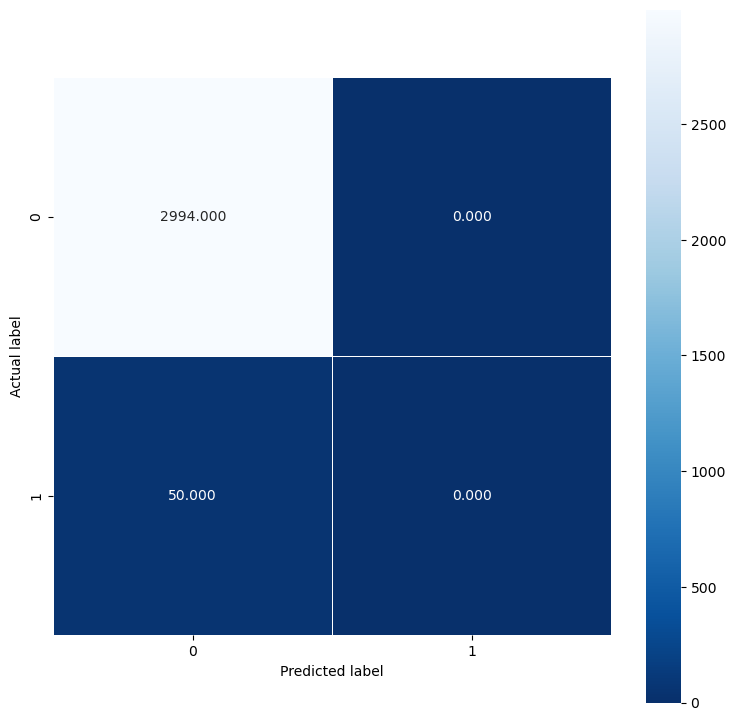

In [27]:
from sklearn.linear_model import LogisticRegression
athletes = sorted(list(dfday['Athlete ID'].unique()))
test_athletes = athletes[len(athletes) - 10:]
X_test = dfday[dfday['Athlete ID'].isin(test_athletes)]
X_train = dfday[~dfday['Athlete ID'].isin(test_athletes)]

y_test = X_test['injury']
y_train = X_train['injury']

X_train = X_train.drop(columns=['injury', 'Date', 'Athlete ID'], errors='ignore')
X_test = X_test.drop(columns=['injury', 'Date', 'Athlete ID'], errors='ignore')


logReg = LogisticRegression()

logReg.fit(X_train,y_train)
predictions = logReg.predict(X_test)
from sklearn import metrics
cm =metrics.confusion_matrix(y_test, predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

Obviously, implementing balanced subsets of the data will increase accuracy massively. I'm going to base my implementation of this on that in the script for replicating the paper.

Accuracy: 0.6689
Precision: 0.0285
Recall(most important): 0.5800
F1 Score: 0.0544
F-beta Score (beta=2): 0.1192


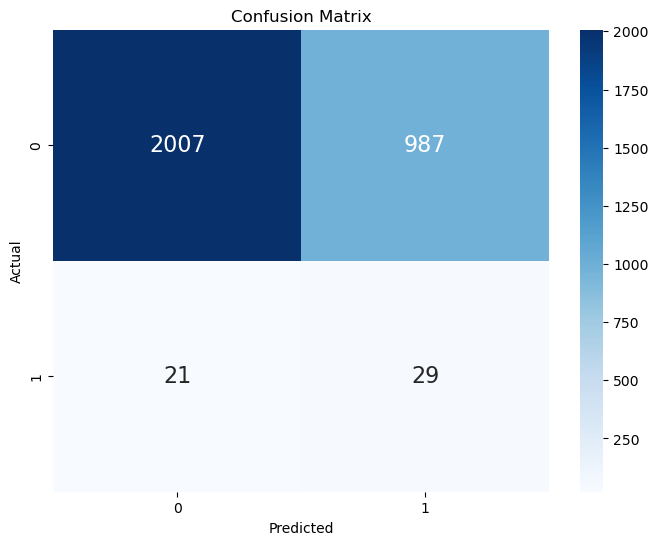

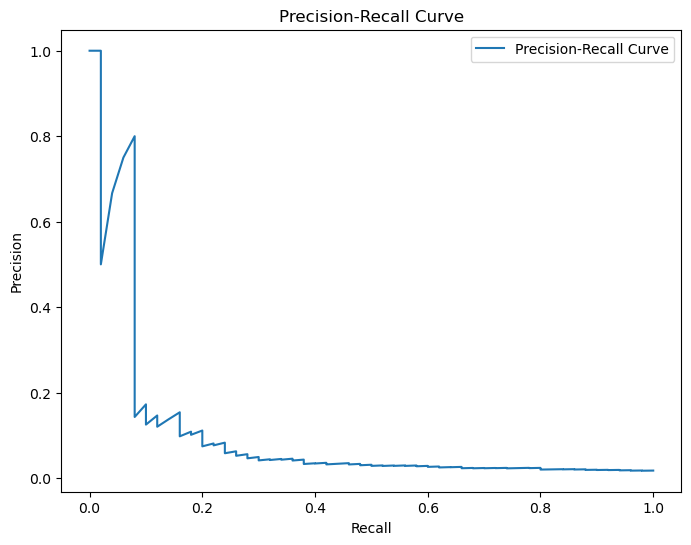

Accuracy: 0.6270
Precision: 0.6434
Recall(most important): 0.5700
F1 Score: 0.6045
F-beta Score (beta=2): 0.5833


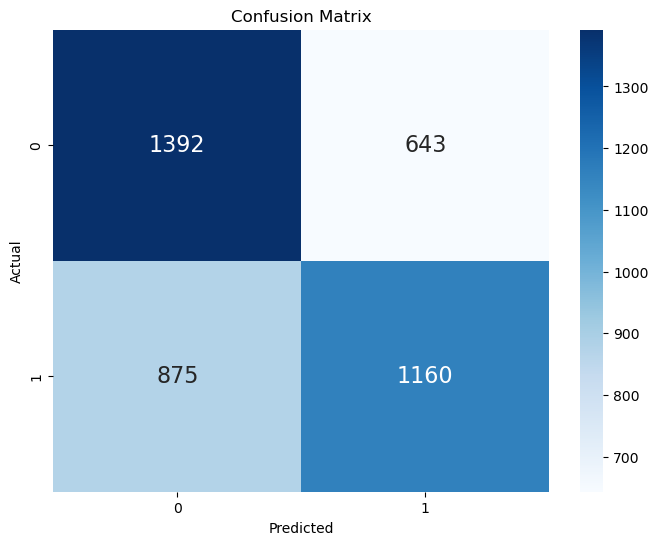

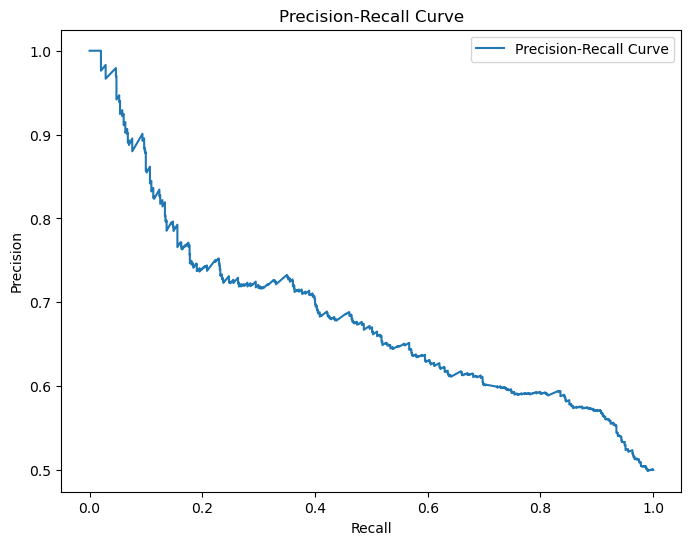

In [28]:
from sklearn.linear_model import LogisticRegression
athletes = sorted(list(dfday['Athlete ID'].unique()))
test_athletes = athletes[len(athletes) - 10:]
X_test_original = dfday[dfday['Athlete ID'].isin(test_athletes)].copy() # Keep a copy for normalization
X_train_original = dfday[~dfday['Athlete ID'].isin(test_athletes)].copy() # Keep a copy


def normalize2(row, mean_df, std_df, athlete_id):
    mu = mean_df.loc[athlete_id]
    su = std_df.loc[athlete_id]
    z = (row - mu)/su
    return z

# Calculate the means and standard deviations of all healthy events per athlete
def getMeanStd(data):
    mean = data[data['injury'] == 0].groupby('Athlete ID').mean()
    std = data[data['injury'] == 0].groupby('Athlete ID').std()
    std.replace(to_replace=0.0, value=0.01, inplace=True)
    return mean, std

def getBalancedSubset(X_train, samplesPerClass):
    healthySet   = pd.DataFrame()
    unhealthySet = pd.DataFrame()
    

    stats = pd.DataFrame(X_train[['Athlete ID','injury']].groupby(['Athlete ID','injury']).size().reset_index(name='counts'))
    stats = pd.DataFrame(stats[['Athlete ID']].groupby(['Athlete ID']).size().reset_index(name='counts'))
    stats.drop(stats[stats['counts'] < 2].index, inplace=True)
    athleteList = stats['Athlete ID'].unique()

    samplesPerAthlete = int(np.floor(samplesPerClass) / len(athleteList))

    for athlete in athleteList:
        if unhealthySet.empty:
            unhealthySet = X_train[(X_train['Athlete ID'] == athlete) & (X_train['injury'] == 0)].sample(samplesPerAthlete, replace=True)
        else:
            unhealthySet = pd.concat([unhealthySet, X_train[(X_train['Athlete ID'] == athlete) & (X_train['injury'] == 0)].sample(samplesPerAthlete,replace=True)], ignore_index=True)
        if healthySet.empty:
            healthySet = X_train[(X_train['Athlete ID'] == athlete) & (X_train['injury'] == 1)].sample(samplesPerAthlete, replace=True)
        else:
            healthySet = pd.concat([healthySet, X_train[(X_train['Athlete ID'] == athlete) & (X_train['injury'] == 1)].sample(samplesPerAthlete,replace=True)], ignore_index=True)


    balancedSet = pd.concat([healthySet, unhealthySet], ignore_index=True)
    return balancedSet

def training_eval(model, y_true, X, y_pred):
    conf_matrix = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    fbeta = fbeta_score(y_true, y_pred, beta=2)  # Emphasize recall

    # Print evaluation metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall(most important): {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"F-beta Score (beta=2): {fbeta:.4f}")

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Plot precision-recall curve
    precision_curve, recall_curve, thresholds = precision_recall_curve(y_true, model.predict_proba(X)[:, 1])
    plt.figure(figsize=(8, 6))
    plt.plot(recall_curve, precision_curve, label='Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

X_train_means, X_train_std = getMeanStd(X_train_original)
X_test_means, X_test_std = getMeanStd(X_test_original)



samples_per_class = 2048
X_train_balanced = getBalancedSubset(X_train_original.copy(), samples_per_class)
y_train = X_train_balanced['injury']
y_test = X_test_original['injury']

# 3. Apply normalization to the *balanced training data*
X_train_normalized = X_train_balanced.apply(lambda x: normalize2(x, X_train_means, X_train_std, x['Athlete ID']), axis=1)
X_train_normalized = X_train_normalized.drop(columns=['injury', 'Date', 'Athlete ID'], errors='ignore')

# 4. Apply normalization to the *test data* using the *test* statistics
# this is a source of potential data leakage
X_test_normalized = X_test_original.apply(lambda x: normalize2(x, X_test_means, X_test_std, x['Athlete ID']), axis=1)
X_test_normalized = X_test_normalized.drop(columns=['injury', 'Date', 'Athlete ID'], errors='ignore')

# 5. Train the Logistic Regression model on the normalized training data
logReg = LogisticRegression()
logReg.fit(X_train_normalized, y_train)

# 6. Make predictions on the normalized test data
predictions = logReg.predict(X_test_normalized)


# 7. Evaluate the model (as you have done)
training_eval(logReg, y_test, X_test_normalized, predictions)
training_eval(logReg, y_train, X_train_normalized, logReg.predict(X_train_normalized))


so this shows that, while the model still vastly overpredicts healthy events, as more methods are used to increase the accuracy, the model improves. Next, more complex models will be used and tuned to hopefully capture more interactions between features

## The below code no longer works because User data is no longer stored in memory

In [29]:
dfday_user =pd.read_csv('../data/processed/df_full.csv')
dfday_user.head(20)
dfday_user.info()

FileNotFoundError: [Errno 2] No such file or directory: '../data/processed/df_full.csv'

In [ ]:
X_test_normalized.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3044 entries, 39189 to 42765
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   hours alternative    3044 non-null   float64
 1   hours alternative.1  3044 non-null   float64
 2   hours alternative.2  3044 non-null   float64
 3   hours alternative.3  3044 non-null   float64
 4   hours alternative.4  3044 non-null   float64
 5   hours alternative.5  3044 non-null   float64
 6   hours alternative.6  3044 non-null   float64
 7   km Z3-4              3044 non-null   float64
 8   km Z3-4.1            3044 non-null   float64
 9   km Z3-4.2            3044 non-null   float64
 10  km Z3-4.3            3044 non-null   float64
 11  km Z3-4.4            3044 non-null   float64
 12  km Z3-4.5            3044 non-null   float64
 13  km Z3-4.6            3044 non-null   float64
 14  km Z5-T1-T2          3044 non-null   float64
 15  km Z5-T1-T2.1        3044 non-nul

In [ ]:
def normalize_user(row, mean_df, std_df):
    mu = mean_df
    su = std_df
    z = (row - mu)/su
    return z

# Calculate the means and standard deviations of all healthy events per athlete
def getMeanStd_user(data):
    mean = data.mean()
    std = data.std()
    std.replace(to_replace=0.0, value=0.01, inplace=True)
    return mean, std

user_test_means, user_test_std = getMeanStd_user(dfday_user.copy())


# 4. Apply normalization to the *test data* using the *training* statistics
# X_test_normalized = X_test_original.drop(columns=['injury', 'Date', 'Athlete ID'], errors='ignore')
# X_test_normalized = X_test_normalized.apply(lambda x: normalize2(x, X_train_means, X_train_std, x['Athlete ID']), axis=1)
user_normalized = dfday_user.apply(lambda x: normalize_user(x, user_test_means,user_test_std), axis=1)
user_normalized = user_normalized.drop(columns=[ 'Date'], errors='ignore')
predictions = logReg.predict(user_normalized)
predictions

C:\Users\milo\AppData\Local\Temp\ipykernel_23672\1880264526.py:9: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = data.mean()
C:\Users\milo\AppData\Local\Temp\ipykernel_23672\1880264526.py:10: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  std = data.std()
c:\Users\milo\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- nr.sessions
- nr.sessions.1
- nr.sessions.2
- nr.

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [ ]:
for i in predictions:
    print(i)

0
1
0
1
1
1
0
1
1
1
1
0
1
1
1
1
0
0
1
0
1
0
1
1
1
1
1
1
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [ ]:
# create a df of predictions using the date column from dfday_user and the predictions
dfday_user['injury'] = predictions
#view the date column and the predictions column
dfday_user[['Date','injury']].head(20)


,Date,injury
0,2024-08-07,0
1,2024-08-08,1
2,2024-08-09,0
3,2024-08-10,1
4,2024-08-11,1
5,2024-08-12,1
6,2024-08-13,0
7,2024-08-14,1
8,2024-08-15,1
9,2024-08-16,1


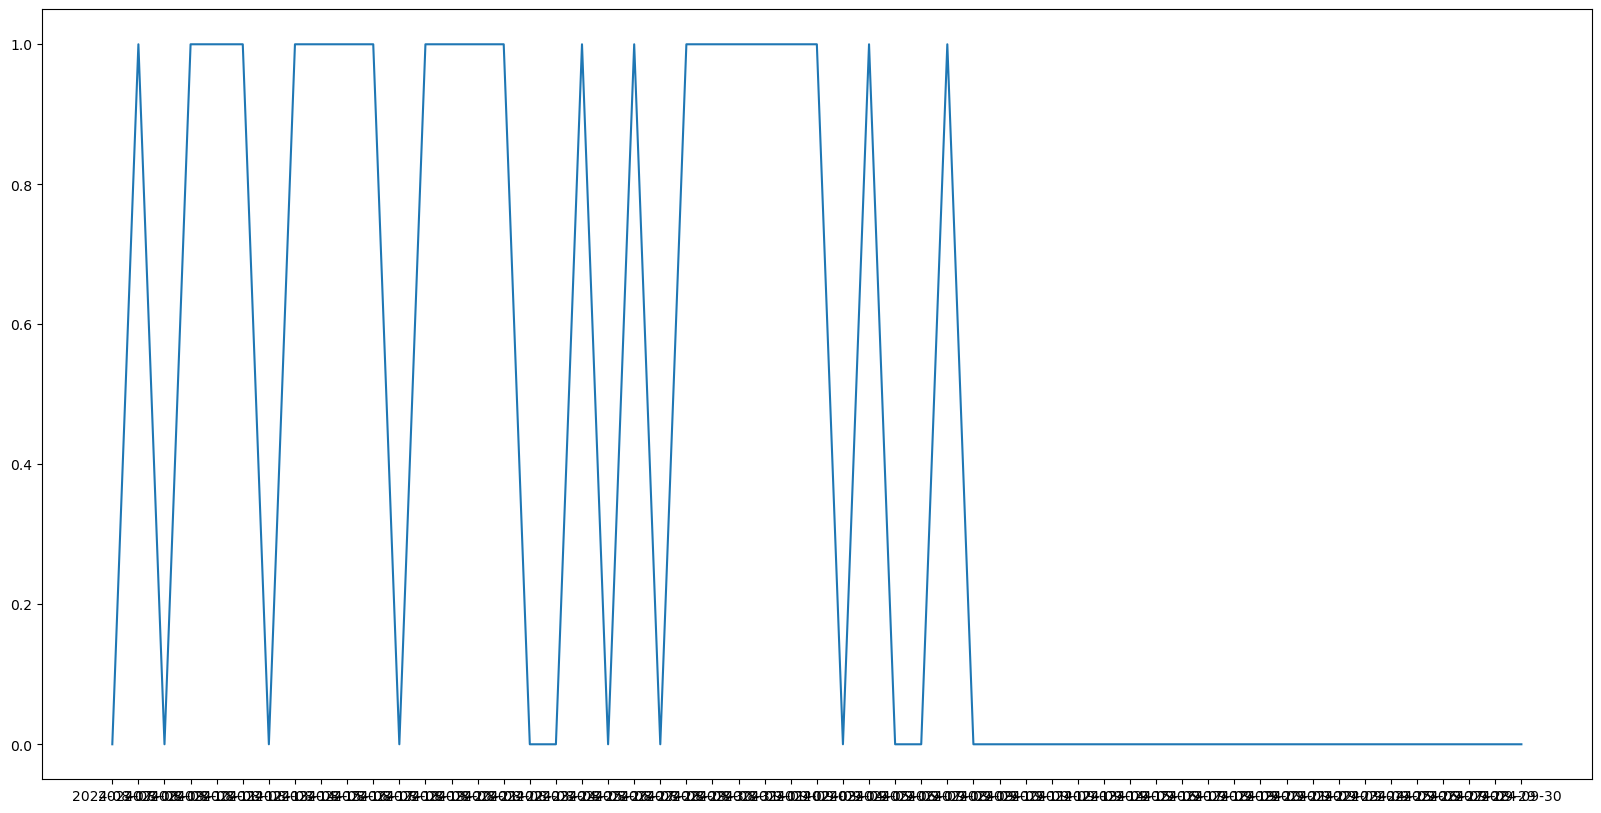

In [ ]:
# Plot the predictions over time
plt.figure(figsize=(20,10))
plt.plot(dfday_user['Date'],dfday_user['injury'])

In [ ]:
# get probabilities of the predictions
probs = logReg.predict_proba(user_normalized)[:, 1]
# create a df of probabilities using the date column from dfday_user and the probs
dfday_user['probabilities'] = probs
#view the date column and the probabilities column
dfday_user[['Date','probabilities']].head(20)

c:\Users\milo\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- nr.sessions
- nr.sessions.1
- nr.sessions.2
- nr.sessions.3
- nr.sessions.4
- ...
Feature names seen at fit time, yet now missing:
- nr. sessions
- nr. sessions.1
- nr. sessions.2
- nr. sessions.3
- nr. sessions.4
- ...

  warnings.warn(message, FutureWarning)


,Date,probabilities
0,2024-08-07,0.414974
1,2024-08-08,0.541373
2,2024-08-09,0.481323
3,2024-08-10,0.618670
4,2024-08-11,0.634128
5,2024-08-12,0.522816
6,2024-08-13,0.302543
7,2024-08-14,0.579562
8,2024-08-15,0.681132
9,2024-08-16,0.631662


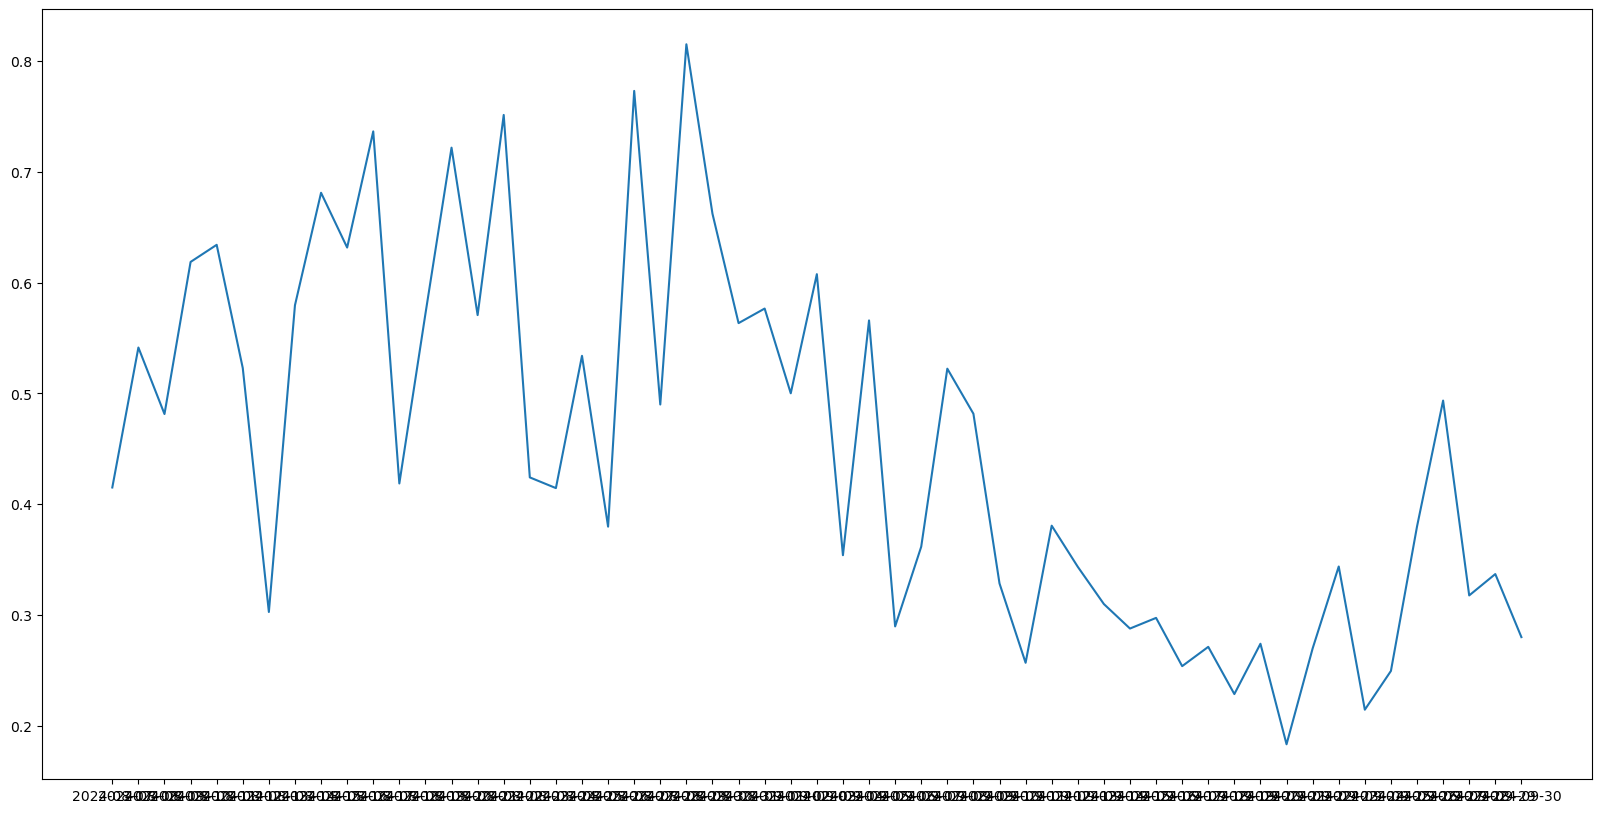

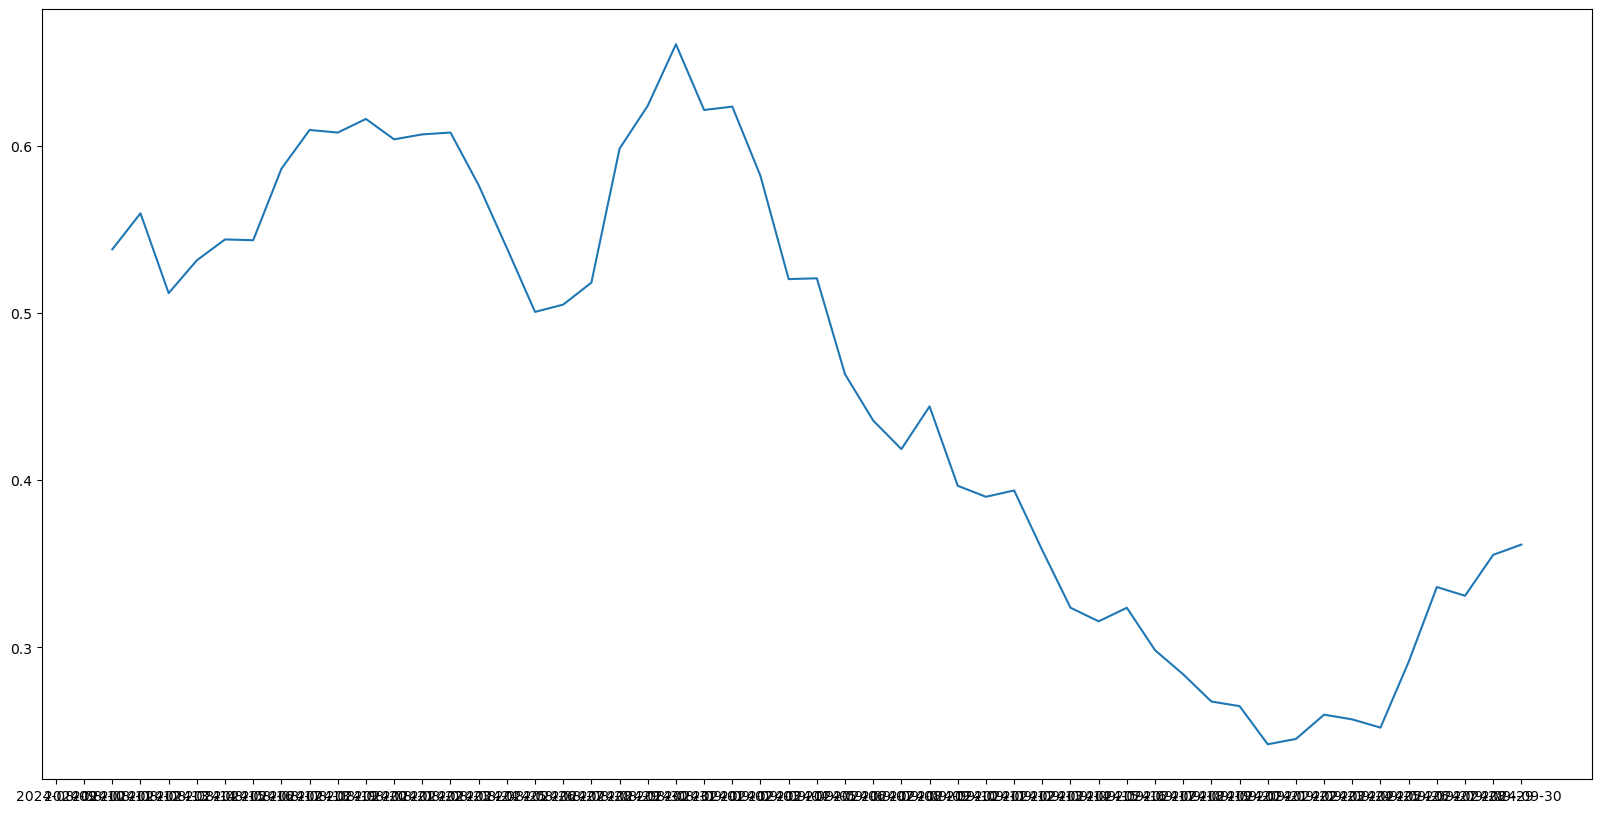

In [ ]:
# plot the probabilities over time
plt.figure(figsize=(20,10))
plt.plot(dfday_user['Date'],dfday_user['probabilities'])
# plot the probabilities over time with a rolling mean
plt.figure(figsize=(20,10))
plt.plot(dfday_user['Date'],dfday_user['probabilities'].rolling(window=5).mean())

In [ ]:
#get the probabilities for X_test_normalized
probs = logReg.predict_proba(X_test_normalized)[:, 1]
# create a df of probabilities using the date column from X_test_original and the probs
X_test_original['probabilities'] = probs
#view the date column and the probabilities column for athlete 30
X_test_original[X_test_original['Athlete ID'] == 30][['Date','probabilities']].head(20)


,Date,probabilities


In [ ]:
dfday_user[['Date','probabilities']].head(32)

,Date,probabilities
0,2024-08-07,0.414974
1,2024-08-08,0.541373
2,2024-08-09,0.481323
3,2024-08-10,0.618670
4,2024-08-11,0.634128
5,2024-08-12,0.522816
6,2024-08-13,0.302543
7,2024-08-14,0.579562
8,2024-08-15,0.681132
9,2024-08-16,0.631662
